In [8]:
import torch
from models.vae import VAE

from data import TinyImageNet
import torchvision.transforms as T

In [3]:
device = torch.device('cuda')
save_dir = '/home/tingchen/bayes-ae-save/'
pretrain_name = 'vae_just_pretrain_tiny_imagenet'
model = VAE(n_latent_dims=2,
                         intermediate_size=2048,
                         input_size=3072).to(device)

model.load_state_dict(
            torch.load(f'{save_dir}models/{pretrain_name}.pt'))

<All keys matched successfully>

In [5]:
data_dir = '/home/tingchen/data/'
loaded_tiny_imagenet = TinyImageNet(data_dir=data_dir,
                                            num_workers=2)

In [6]:
val_batch = next(iter(loaded_tiny_imagenet.val_loader))

In [11]:
val_batch[0].shape

torch.Size([10000, 3, 32, 32])

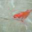

In [17]:
transform = T.ToPILImage()

transform(val_batch[0][1])

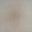

In [18]:
transform(model(val_batch[0][1].reshape(1, 3072).to(device)).reshape(3, 32, 32))

In [21]:
train_batch = next(iter(loaded_tiny_imagenet.train_loader))

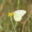

In [24]:
transform(train_batch[0][0])

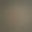

In [25]:
transform(model(train_batch[0][0].reshape(1, 3072).to(device)).reshape(3, 32, 32))